<a href="https://colab.research.google.com/github/himabindu-github/Hackbio-Oct25/blob/main/Stage2_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1 : Set up and loading the dataset**


*   Installing essential Python libraries for single-cell data processing
*   Importing the libraries
*   Downloading the dataset and loading it into scanpy AnnData format
*   Inspecting the structure of the dataset to understand what we are working with






**1. Install required python packages :**
- packages needed for preprocessing, visualization, cell-type annotation

**What these libraries do:**

scanpy : core library for scRNA-seq analysis

anndata : for handling annotated data matrices

igraph : required for Leiden clustering

celltypist : automated cell-type annotation

decoupler : framework for various statistical methods to extract biologically driven scores








In [2]:
# Installation of necessary packages for single cell data analysis

!pip install scanpy
!pip install anndata
!pip install igraph
!pip install celltypist
!pip install decoupler
!pip install scrublet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 70.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 389.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

**2. Import the Libraries**

In [3]:
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt
import seaborn as sns
import scrublet as scr
import decoupler as dc

**3. Download the dataset**

We download the bone marrow .h5ad file (AnnData format) from GitHub.

In [4]:
!wget "https://github.com/josoga2/sc/raw/refs/heads/main/bone_marrow.h5ad"

--2025-11-19 13:36:38--  https://github.com/josoga2/sc/raw/refs/heads/main/bone_marrow.h5ad
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad [following]
--2025-11-19 13:36:39--  https://media.githubusercontent.com/media/josoga2/sc/refs/heads/main/bone_marrow.h5ad
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 354509549 (338M) [application/octet-stream]
Saving to: ‘bone_marrow.h5ad’

bone_marrow.h5ad    100%[===================>] 338.09M  71.8MB/s    in 4.6s    

2025-11-19 13:36:44 (73.1 MB/s) - ‘bone_marrow.h5ad’ saved [354509549/35450

**4. Load the data into scanpy**

In [5]:
# load data in scanpy
bone_marrow_adata = sc.read_h5ad("bone_marrow.h5ad")

**5. Inspect the data and metadata**

This tells us:

number of cells

number of genes

cells and genes metadata

In [6]:
bone_marrow_adata.shape
print(bone_marrow_adata)

# cells metadata = obs
bone_marrow_adata.obs.head()

# genes metadata = var
bone_marrow_adata.var.head()

# gene names list
bone_marrow_adata.var_names

# barcode list -- correspond to cells
bone_marrow_adata.obs_names

# convert to dataframe for quick explorations
bone_marrow_df = bone_marrow_adata.to_df()
bone_marrow_df.head()

AnnData object with n_obs × n_vars = 14783 × 17374
    obs: 'disease stage', 'treatment', 'timepoint', 'Dataset', 'sample', 'disease_original', 'disease_general', 'COVID-19 Condition', 'Lineage', 'Cell.group', 'Cell.class_reannotated', 'n_genes', 'n_counts', 'percent_mito', 'tissue_original', 'tissue_ontology_term_id', 'disease_ontology_term_id', 'donor_id', 'development_stage_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'tissue_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'n_cells', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'citation', 'doi', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_pca', 'X_tsne', 'X_umap'


,ENSG00000161920,ENSG00000122335,ENSG00000175548,ENSG00000100330,ENSG00000176340,ENSG00000179846,ENSG00000204860,ENSG00000172260,ENSG00000141424,ENSG00000164512,...,ENSG00000164114,ENSG00000151702,ENSG00000224578,ENSG00000138756,ENSG00000111052,ENSG00000176946,ENSG00000150456,ENSG00000284934,ENSG00000261842,ENSG00000260456
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.0,0.000000,0.0,0.0,9.436466,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGAGGTTGC-7,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,8.817776,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGATACACA-3,0.0,8.651494,0.0,0.0,8.651494,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGCGATTCT-1,0.0,0.000000,0.0,0.0,8.858533,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Guo-AAACCTGAGTGAAGAG-3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 **Step 2: Preprocessing & Quality Control (QC)**



Goal: Identify and remove poor-quality cells such as:
 - empty droplets
 - doublets (two cells captured as one)
 - dead/dying cells
 - generally low-quality cells

We use QC metrics like:
- n_genes_by_counts : Low → empty/dying cell; High → doublet
- total_counts : Low → low capture; High → doublet
- pct_counts_mt : High mitochondrial percentage → stressed/dying
- pct_counts_ribo : High ribosomal gene percentage → possibly activated


In [7]:
# Make variable & observation names unique
bone_marrow_adata.var_names_make_unique()
bone_marrow_adata.obs_names_make_unique()

# why: scanpy needs unique identifiers for both cells and genes, if not it mixes up or overwrites data.

In [8]:
# Identify mitochondrial/ribosomal/hb genes
bone_marrow_adata.var["MT"] = bone_marrow_adata.var["feature_name"].str.startswith("MT-")
bone_marrow_adata.var["ribo"] = bone_marrow_adata.var["feature_name"].str.startswith(("RPS", "RPL"))
bone_marrow_adata.var["hb"] = bone_marrow_adata.var["feature_name"].str.startswith(("HBA", "HBB", "HBG"))

# why: we mark which genes are mitochondrial, ribosomal, or hemoglobin so we can measure how much each cell expresses them to helps us spot stressed or low-quality cells.


In [9]:
# Calculate QC metrics
# This adds columns such as: total_counts, n_genes_by_counts, pct_counts_MT, pct_counts_ribo
sc.pp.calculate_qc_metrics(
bone_marrow_adata,
qc_vars=["MT", "ribo", "hb"],
log1p=True,
inplace=True
)

# why: QC metrics help us decide which cells to keep or discard.

# check the added columns
bone_marrow_adata.obs.head()
bone_marrow_adata.var.head()

,n_cells,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type,MT,ribo,hb,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts
ENSG00000161920,927,False,MED11,NCBITaxon:9606,gene,754,protein_coding,False,False,False,885,0.502831,0.407351,94.013394,7433.353516,8.913867
ENSG00000122335,429,False,SERAC1,NCBITaxon:9606,gene,2683,protein_coding,False,False,False,405,0.231814,0.208488,97.260367,3426.911377,8.139707
ENSG00000175548,149,False,ALG10B,NCBITaxon:9606,gene,1773,protein_coding,False,False,False,142,0.082084,0.078889,99.039437,1213.443970,7.102042
ENSG00000100330,426,False,MTMR3,NCBITaxon:9606,gene,634,protein_coding,False,False,False,404,0.227307,0.204822,97.267131,3360.278564,8.120077
ENSG00000176340,7171,False,COX8A,NCBITaxon:9606,gene,494,protein_coding,False,False,False,6898,4.277597,1.663471,53.338294,63235.750000,11.054641


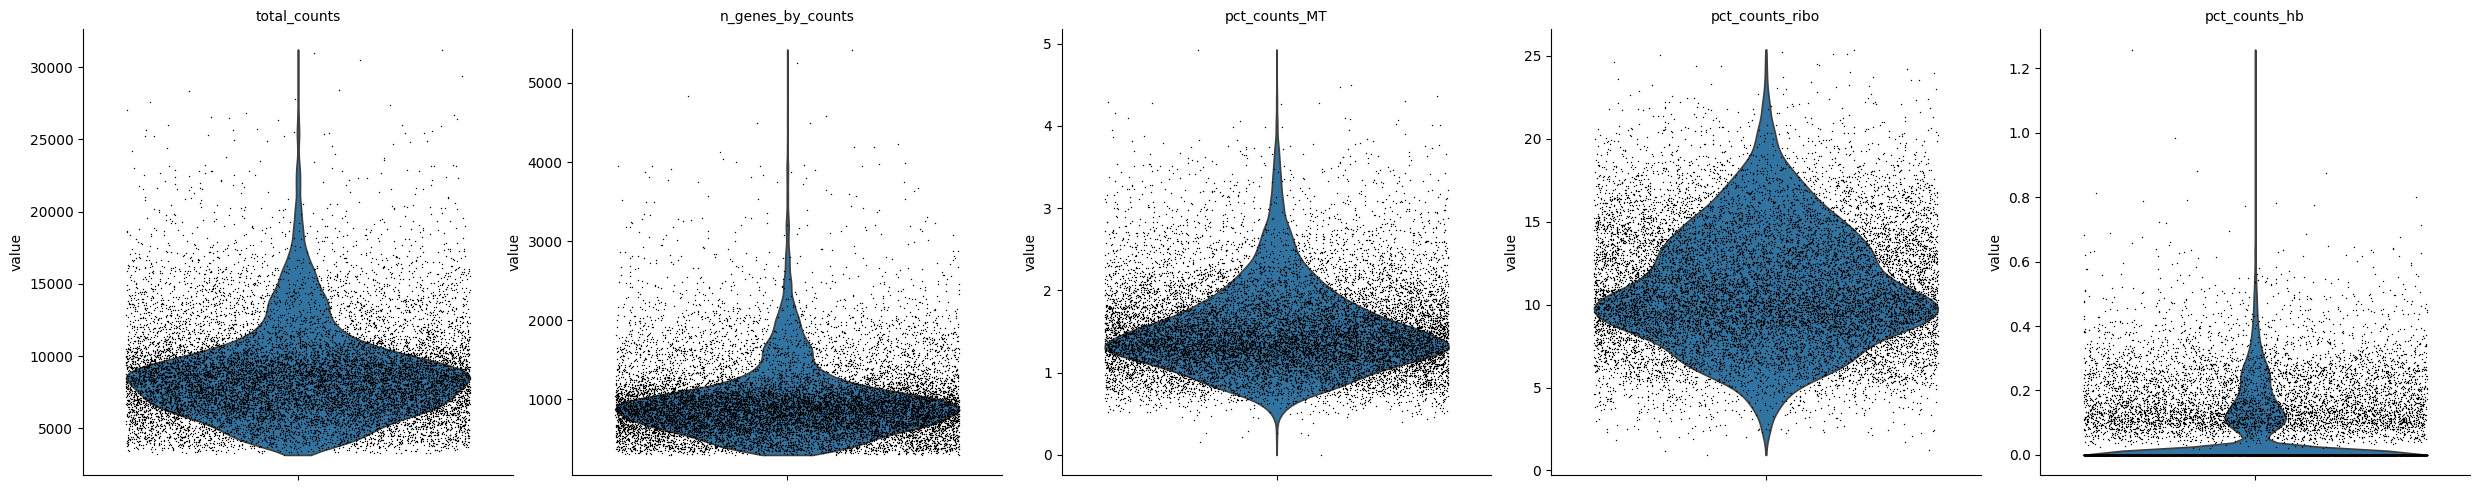

In [10]:
# Plot QC metrics for inspection
#sc.pl.violin(bone_marrow_adata, ["n_genes_by_counts"], jitter=0.4, multi_panel=False)
#sc.pl.violin(bone_marrow_adata, ["total_counts"], jitter=0.4, multi_panel=False)
sc.pl.violin(
bone_marrow_adata,
["total_counts", "n_genes_by_counts", "pct_counts_MT", "pct_counts_ribo", "pct_counts_hb"],
jitter=0.4,
multi_panel=True
)

# why : to visually identify good and bad cells, so we can set the right filtering thresholds for this dataset.
# the violin plots show the typical ranges of no. of genes per cell, no. of transcripts, % of mito and ribo genes



**Interpretation:**

**1. total_counts:**
- wide base in violin plot represents high cell density and
a large fraction of cells fall in the transcript range 5000-10000
- most of the cells have 5k-10k transcripts per cell
- very few cells have high transcript content (thin peak at 30k transcripts)

**n_genes_by_counts:**
- most cells have 1000 genes detected and very few have high gene counts; activated cells/ doublets

**pct_counts_MT:**
- most of the cells have 1% mitochondrial content and very few have upto 5%

**pct_counts_ribo :**
- most cells have a normal level of ribosomal transcripts

The distributions look normal, with low mitochondrial content and acceptable robosomal content

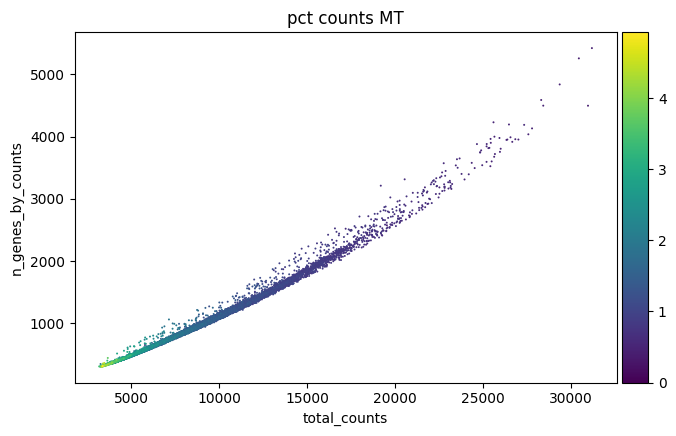

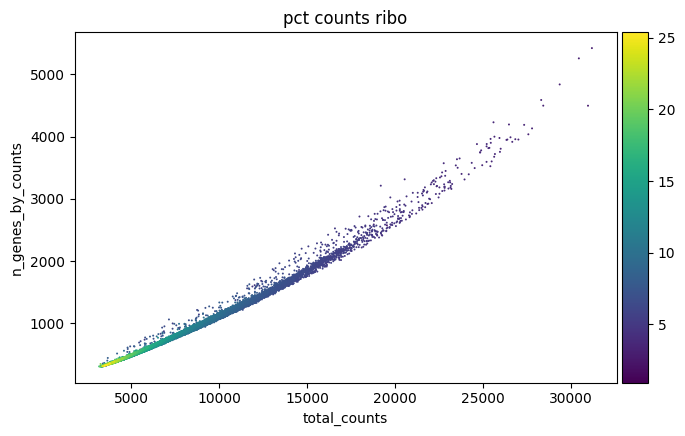

In [11]:
# Scatter plots to observe MT/ribo influence
sc.pl.scatter(
bone_marrow_adata,
"total_counts",
"n_genes_by_counts",
color="pct_counts_MT"
)


sc.pl.scatter(
bone_marrow_adata,
"total_counts",
"n_genes_by_counts",
color="pct_counts_ribo"
)

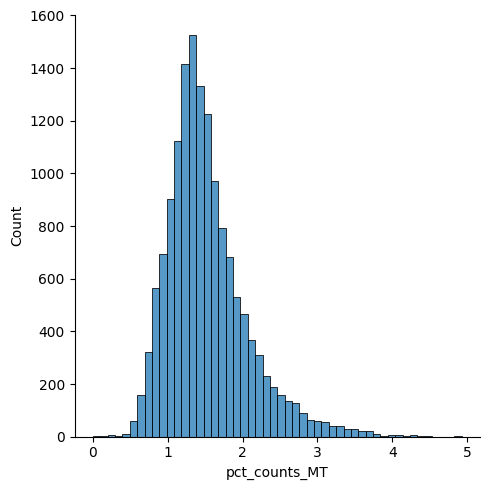

In [12]:
sns.displot(bone_marrow_adata.obs["pct_counts_MT"], bins=50, kde=False)

In [13]:

# Filter low quality cells
# low quality cells: low number of detected genes, low count depth/total_counts, high mitochondrial counts
# Define QC thresholds

MIN_GENES = 200
MAX_GENES = 4000
MIN_CELLS = 3
MAX_MT = 5  # percent mitochondrial RNA


#  Filter rarely detected genes
sc.pp.filter_genes(bone_marrow_adata, min_cells=MIN_CELLS)


#  Filter cells using a boolean mask

cell_mask = (
    (bone_marrow_adata.obs['n_genes_by_counts'] >= MIN_GENES) &
    (bone_marrow_adata.obs['n_genes_by_counts'] <= MAX_GENES) &
    (bone_marrow_adata.obs['pct_counts_MT'] < MAX_MT)
)

bone_marrow_adata = bone_marrow_adata[cell_mask].copy()


# Check remaining cells and genes

print(f"Remaining cells after QC: {bone_marrow_adata.n_obs}")
print(f"Remaining genes after QC: {bone_marrow_adata.n_vars}")


Remaining cells after QC: 14772
Remaining genes after QC: 17372


In [14]:

# Detect doublets in the data
scrub = scr.Scrublet(bone_marrow_adata.X)
doublet_scores, predicted_doublets = scrub.scrub_doublets()

# add Boolean columns to bone_marrow_adata.obs
bone_marrow_adata.obs['doublet_score'] = doublet_scores
bone_marrow_adata.obs['predicted_doublet'] = predicted_doublets

# remove predicted doublets
bone_marrow_adata = bone_marrow_adata[~bone_marrow_adata.obs['predicted_doublet']].copy()


Preprocessing...


/usr/local/lib/python3.12/dist-packages/scrublet/helper_functions.py:239: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/usr/local/lib/python3.12/dist-packages/scrublet/helper_functions.py:252: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.25
Detected doublet rate = 8.1%
Estimated detectable doublet fraction = 60.2%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 13.5%
Elapsed time: 40.1 seconds


In [15]:
bone_marrow_adata.layers['counts'] = bone_marrow_adata.X.copy()

**Step 3. Normalization**
- To remove cell to cell technical variation
- normalize to median total counts
- makes all cells have the same total counts, equal to the median library size.
- Cells with fewer counts get boosted, and cells with too many counts get reduced, so everything is on the same level.
- log transformation done after normalization; makes data less noisy, shrinks
big numbers and spreads out small numbers
- log-transformation is not possible for exact zeros, so add a small pseudo count, 1 (log1p), to all normalized counts before log transforming the data

In [16]:
sc.pp.normalize_total(bone_marrow_adata)
sc.pp.log1p(bone_marrow_adata)

**Feature selection:**
- choosing the most informative genes, HVGs: highly variable genes
- uninformative genes are removed.

In [17]:
sc.pp.highly_variable_genes(bone_marrow_adata, n_top_genes=2000)

# why: we select hvgs to reduce dimensionality, better clustering and to focus on biologically meaningful signals
# 2000 genes: better balance signal vs noise, can go up for larger datasets

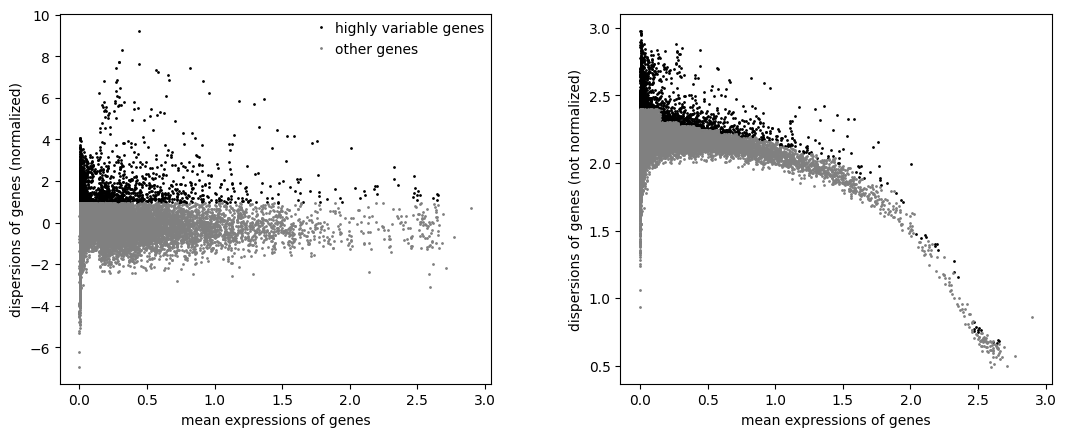

In [18]:
sc.pl.highly_variable_genes(bone_marrow_adata)
# Visualize hvgs to check which genes were selected for downstream analysis

**Step 4. Dimensionality reduction**
- Feature selection reduces the dimensionality of data, in this step we further reduce the dimensions of data with dimensionality reduction algorithms.
- These algorithms are an important step during preprocessing to reduce the data complexity and for visualization.

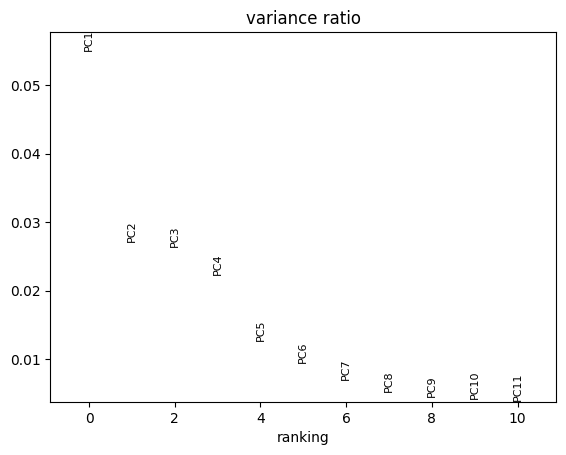

In [19]:
# computes PCA on normalized and log transformed data
# the PCA loadings, variance, coordinates are added to the anndata object

sc.tl.pca(bone_marrow_adata)
sc.pl.pca_variance_ratio(bone_marrow_adata, n_pcs=10, log=False)

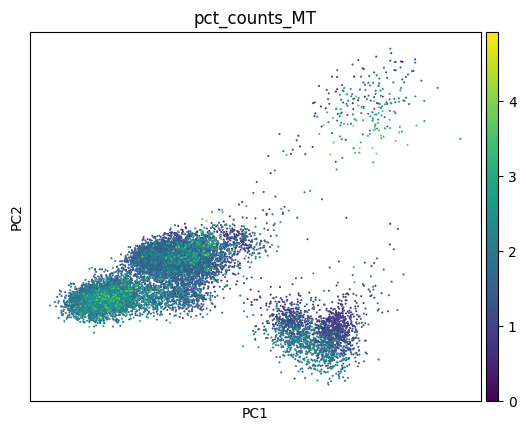

(None,)

In [20]:
# Scatter plot of first two PCs colored by mitochondrial RNA fraction to visually assess how it contributes to major variation in the data
sc.pl.pca(
bone_marrow_adata,
color=["pct_counts_MT"]),

**Step 6. Clustering & annotation**
- we structure cells into clusters to infer the identity of similar cells.
- Nearest neighbor graph is computed
- The Leiden algorithm operates on this graph to identify clusters of cells
- After clusters are defined, they can be annotated by comparing marker gene expression to known cell-type signatures


In [21]:
sc.pp.neighbors(bone_marrow_adata)
# looks at PCA coordinates and finds the closest cells (neighbors, maybe 10 or 15)
# tells which cells are similar to each other and this info is used by UMAP & clustering to group cells

In [22]:
sc.tl.umap(bone_marrow_adata)
# Reduces high-dimensional data to 2D while preserving neighbor relationships

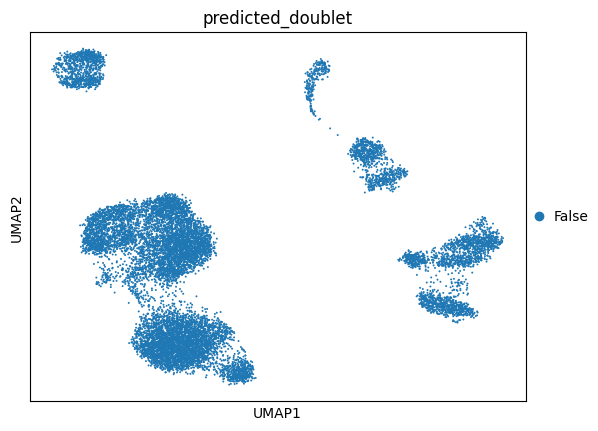

In [23]:
sc.pl.umap(
    bone_marrow_adata,
    color=["predicted_doublet"],
    size=8,
)

# QC visualization: plot UMAP colored by metrics doublet predictions
# to check if technical artifacts or low-quality cells influence the clustering

# almost all the cells passed this QC metric, no impact on clustering.


In [24]:
# groups similar cells into clusters based on how close and connected they are in the neighbor graph (from pp.neighbors).
# adds the cluster labels to the obs (cells) in anndata object as a separate column.
sc.tl.leiden(bone_marrow_adata, flavor="igraph", n_iterations=2)

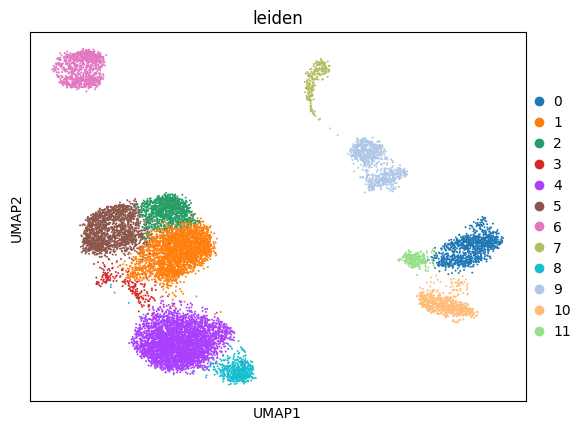

In [25]:
# plots umap and color the clusters based on leiden column
sc.pl.umap(
    bone_marrow_adata,
    color=["leiden"],
    size=8,
)

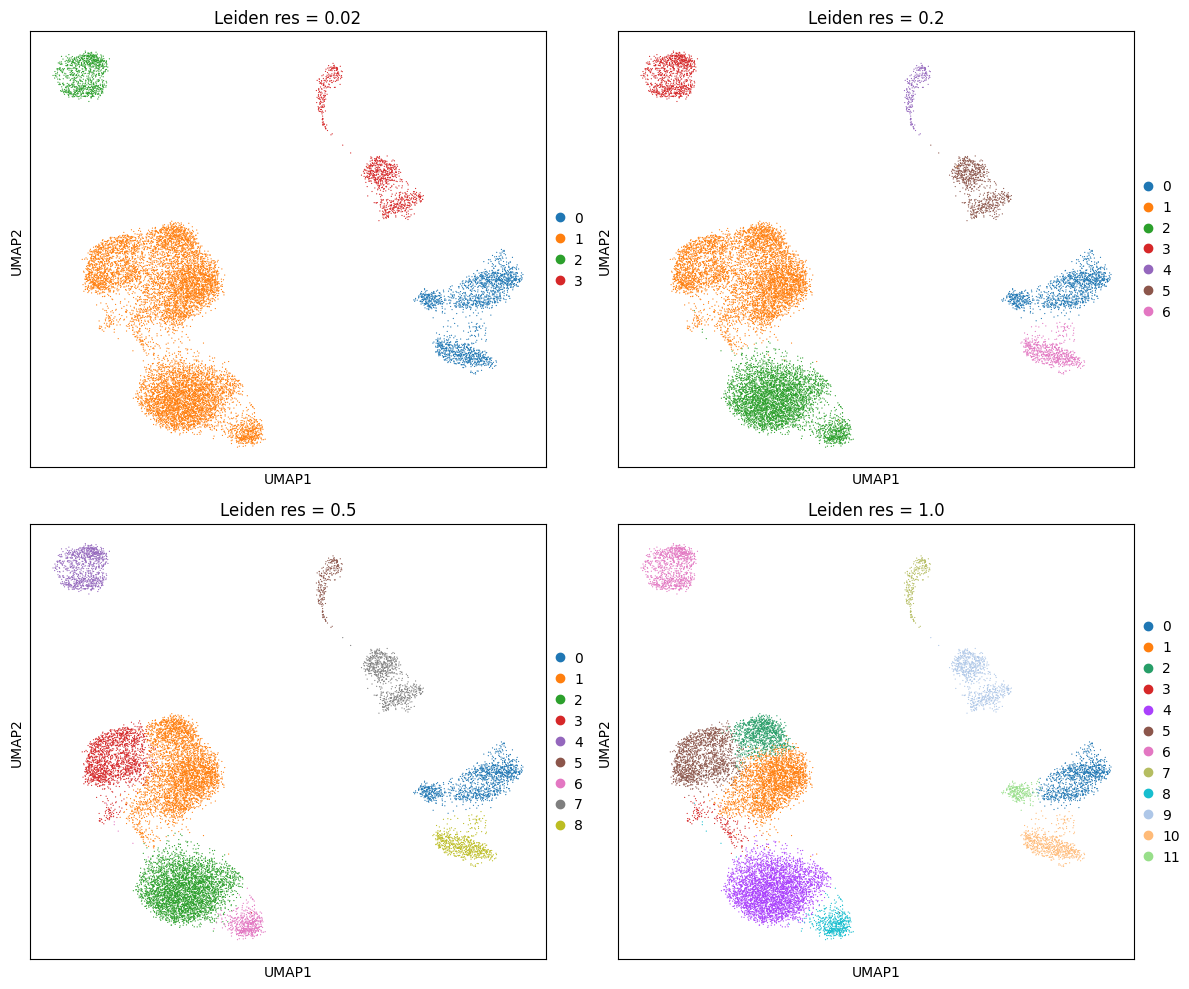

In [26]:
# Run Leiden clustering at multiple resolutions and plot UMAPs to compare how cluster granularity changes

# function to perform lieden at 4 resolutions

def plot_multiple_leiden(adata, resolutions, size=3, figsize=(12, 10)):
    """
    Run Leiden clustering at 4 resolutions and plot all UMAPs in a 2×2 grid.

    Parameters :
    adata : bone_marrow_adata
    resolutions : list of resolutions
    size : points size for UMAP.
    figsize : overall figure size.
    """

    # Run Leiden for every resolution
    for res in resolutions:
        key = f"leiden_res{str(res).replace('.', '_')}" # replace '.' in 0.02 to '_' to get the key like 'leiden_res0_02'
        sc.tl.leiden(
            adata,
            resolution=res,
            key_added=key,
            flavor="igraph",
            n_iterations=2
        )

    # Create a clean 2×2 grid
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.flatten()

    # Plot each Leiden UMAP in its panel
    for i, res in enumerate(resolutions):
        key = f"leiden_res{str(res).replace('.', '_')}"
        sc.pl.umap(
            adata,
            color=[key],
            ax=axes[i],
            show=False,
            size=size,
            title=f"Leiden res = {res}"
        )

    plt.tight_layout()
    plt.show()


# calling the function
plot_multiple_leiden(
    adata=bone_marrow_adata,
    resolutions=[0.02, 0.2, 0.5, 1.0]
)


Annotation with decoupler
- The process of labeling groups of cells in the data based on known cellular phenotypes is called cell annotation.
- cell types can be assigned by manually checking which genes are highly expressed in each cluster and comparing them to known marker genes.
- Decoupler makes this automatic and data-driven. It uses sets of genes (gene signatures) representing cell types or pathways and calculates an activity score for each cell or cluster.


In [27]:
# Query Omnipath and retrieve PanglaoDB markers
# PanglaoDB: database of marker genes for many human and mouse cell types.
# output: a table with cell type, marker genes, whether they are canonical etc.,
markers = dc.op.resource(name="PanglaoDB", organism="human")

# Keep only canonical markers for better specificity
markers = markers[markers["canonical_marker"]]

# Remove duplicate entries (same cell type + gene)
markers = markers[~markers.duplicated(["cell_type", "genesymbol"])]

# Format markers for Decoupler: it expects 'source' = cell type, 'target' = gene
markers = markers.rename(columns={"cell_type": "source", "genesymbol": "target"})
markers = markers[["source", "target"]]

# View top markers
markers.head()

,source,target
,,
2,Bergmann glia,A2M
4,Mast cells,A4GALT
5,Embryonic stem cells,A7KBS4
8,Pinealocytes,AANAT
9,Astrocytes,AANAT


In [28]:
bone_marrow_adata.var_names = bone_marrow_adata.var['feature_name']
#bone_marrow_adata.var_names_make_unique()


/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:865: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['MED11', 'SERAC1', 'ALG10B', 'MTMR3', 'COX8A']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


In [29]:
#load the gene expression matrix into dc
# decoupler's ulm method: univariate linear method to compute gene set activity scores
# it takes the AnnData object (bone_marrow_adata), the markers and a min number of genes per signature, here it is 3
# ulm goes through each cell-type signature (source) in the markers table and,
# when at least three of its marker genes appear in the AnnData object, it calculates an activity score and saves it in score_ulm.
dc.mt.ulm(data=bone_marrow_adata,
          net=markers,
          tmin = 3)


In [30]:
# Inspect score_ulm information in AnnData
# See the first few rows of the score matrix
bone_marrow_adata.obsm['score_ulm'].head()

,Acinar cells,Adipocytes,Adrenergic neurons,Airway goblet cells,Alpha cells,Alveolar macrophages,Astrocytes,B cells,B cells memory,B cells naive,...,T follicular helper cells,T helper cells,T memory cells,T regulatory cells,Tanycytes,Taste receptor cells,Thymocytes,Trophoblast cells,Tuft cells,Urothelial cells
index,,,,,,,,,,,,,,,,,,,,,
Guo-AAACCTGAGAGCTTCT-2,0.883670,0.016256,-0.592757,-0.662743,0.835614,0.856473,0.298214,1.486033,-0.306717,0.238024,...,-0.513326,-0.423097,1.642819,-0.004638,0.544455,0.413508,-0.543513,-0.513326,3.113416,-0.784217
Guo-AAACCTGAGAGGTTGC-7,-0.906467,-1.284387,-0.467941,-0.523190,1.583119,1.219627,0.157786,0.487776,-0.624662,1.769928,...,-0.405236,3.167509,-0.405236,0.462729,0.897597,0.897597,3.847747,-0.405236,-0.202599,-0.619084
Guo-AAACCTGAGATACACA-3,-0.892505,-0.682674,-0.460734,-0.515132,1.573080,1.187988,1.655773,3.930445,1.925937,2.499880,...,-0.398995,1.170155,2.443071,-0.798209,0.924758,-0.651655,1.906049,2.286391,0.851593,-0.609549
Guo-AAACCTGAGCGATTCT-1,-0.922328,-0.773060,-0.476129,-0.532344,0.269655,1.181144,0.774176,4.512343,1.123693,1.731504,...,-0.412327,0.081125,2.300339,-0.824880,-0.673429,-0.673429,0.929876,-0.412327,1.709496,-0.629916
Guo-AAACCTGAGTGAAGAG-3,-0.643712,-0.510367,-0.332303,-0.371537,-0.621867,1.977795,0.019187,1.642685,2.016055,2.029907,...,-0.287775,2.170146,3.344433,1.184652,-0.470003,-0.470003,-0.761786,-0.287775,1.786956,-0.439635


In [31]:
# Extract the computed ULM activity scores
# Stored in bone_marrow_adata.obsm['score_ulm']
score = dc.pp.get_obsm(bone_marrow_adata, key="score_ulm")
score
print(bone_marrow_adata.obsm["score_ulm"].columns)  # list of cell-type signatures
#print(bone_marrow_adata.obs.columns.tolist())

Index(['Acinar cells', 'Adipocytes', 'Adrenergic neurons',
       'Airway goblet cells', 'Alpha cells', 'Alveolar macrophages',
       'Astrocytes', 'B cells', 'B cells memory', 'B cells naive',
       ...
       'T follicular helper cells', 'T helper cells', 'T memory cells',
       'T regulatory cells', 'Tanycytes', 'Taste receptor cells', 'Thymocytes',
       'Trophoblast cells', 'Tuft cells', 'Urothelial cells'],
      dtype='object', length=126)


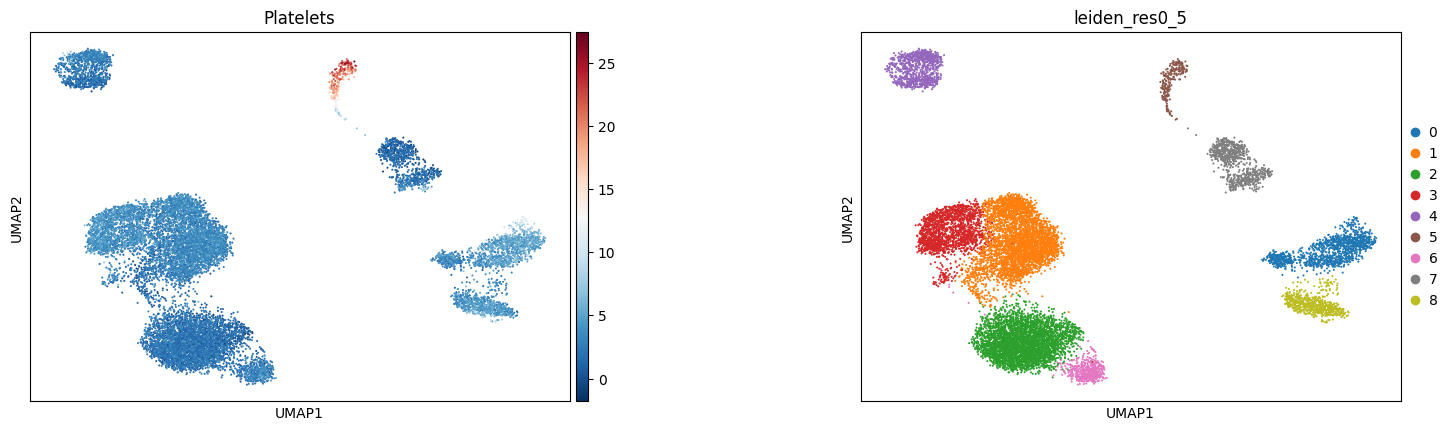

In [32]:
sc.pl.umap(
    score,
    color=["Platelets", "leiden_res0_5"],
    cmap="RdBu_r",
    wspace=0.4
)


In [33]:
# ===========================
# Step: Rank marker genes per cluster for annotation
# ===========================

# 1. Rank genes by cluster using Decoupler
#    - groupby: cluster assignment (leiden_res0_5)
#    - reference: "rest" (compare cluster vs all other cells)
#    - method: t-test_overestim_var
bone_marrow_adata_rank = dc.tl.rankby_group(
    score,
    groupby="leiden_res0_5",
    reference="rest",
    method="t-test_overestim_var"
)

# 2. Keep only genes positively enriched in the cluster (stat > 0)
#    - These are candidate marker genes for the cluster
bone_marrow_adata_rank = bone_marrow_adata_rank[bone_marrow_adata_rank["stat"] > 0]

# 3. Inspect top ranked markers
bone_marrow_adata_rank.head()

# 4. Take top-ranked gene per cluster and create a dictionary
#    - Maps cluster ID to a representative marker gene
cluster_annotations = (
    bone_marrow_adata_rank
    .groupby("group")
    .head(1)
    .set_index("group")["name"]
    .to_dict()
)

# Example output: { '0': 'CD3D', '1': 'MS4A1', ... }
print(cluster_annotations)


{'0': 'Neutrophils', '1': 'Gamma delta T cells', '2': 'Nuocytes', '3': 'NK cells', '4': 'B cells naive', '5': 'Platelets', '6': 'Nuocytes', '7': 'Plasma cells', '8': 'Monocytes'}


/tmp/ipython-input-532687809.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("group")


In [41]:
cluster_annotations

{'0': 'Neutrophils',
 '1': 'Gamma delta T cells',
 '2': 'Nuocytes',
 '3': 'NK cells',
 '4': 'B cells naive',
 '5': 'Platelets',
 '6': 'Nuocytes',
 '7': 'Plasma cells',
 '8': 'Monocytes'}

In [34]:
bone_marrow_adata.obs['cell_type'] = bone_marrow_adata.obs['leiden_res0_5'].map(cluster_annotations)

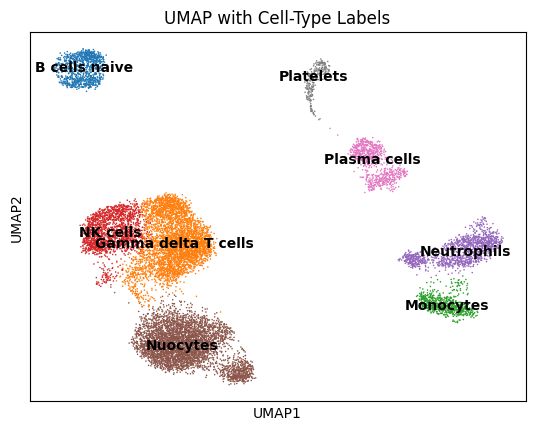

In [35]:
# Plot UMAP with cell-type labels directly on the plot
sc.pl.umap(
    bone_marrow_adata,
    color='cell_type',
    legend_loc='on data',
    legend_fontsize=10,
    size=5,
    title='UMAP with Cell-Type Labels'
)

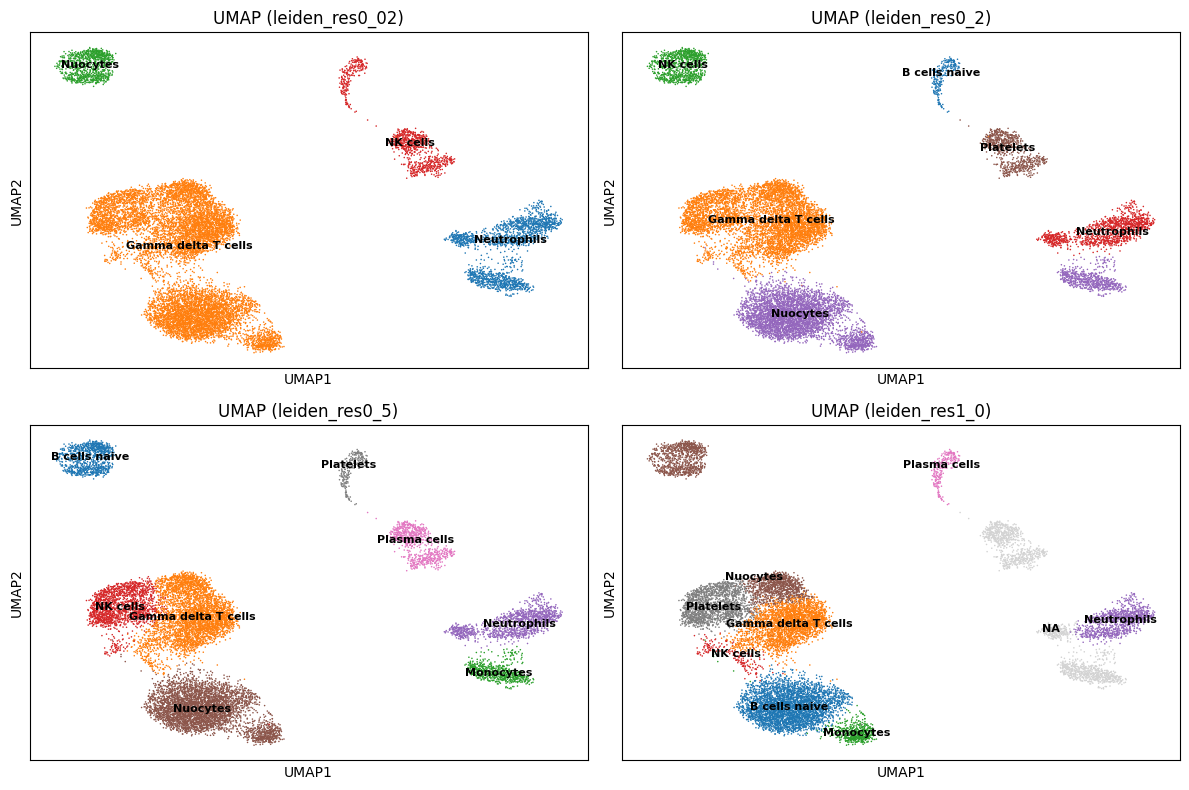

In [40]:
import matplotlib.pyplot as plt

def plot_celltype_umap_multiple_resolutions(adata, cluster_annotations, resolutions, umap_key='X_umap', size=5, ncols=2, figsize=(12, 8)):
    """
    Plots UMAPs for multiple clustering resolutions with cell-type labels.

    Parameters:

    adata : AnnData object with UMAP coordinates.
    cluster_annotations : dict mapping from cluster ID to cell-type label.
    resolutions : list of str; list of leiden resolutions ['leiden_res0_02', 'leiden_res0_2', 'leiden_res0_5', 'leiden_res_1']
    umap_key : str; key in adata.obsm for UMAP coordinates.
    size : int; points size in UMAP plot.
    ncols : int; number of columns in the figure grid.
    figsize : tuple, the size of figure.
    """

    nrows = (len(resolutions) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()

    for i, res in enumerate(resolutions):
        # Map cluster IDs to cell-type labels
        adata.obs['cell_type_temp'] = adata.obs[res].map(cluster_annotations)

        # Plot UMAP with cell-type labels
        sc.pl.umap(
            adata,
            color='cell_type_temp',
            ax=axes[i],
            show=False,
            legend_loc='on data',
            legend_fontsize=8,
            size=size,
            title=f'UMAP ({res})'
        )

    # Hide any unused axes
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

resolutions = ['leiden_res0_02', 'leiden_res0_2', 'leiden_res0_5', 'leiden_res1_0']
plot_celltype_umap_multiple_resolutions(bone_marrow_adata, cluster_annotations, resolutions)


In [42]:
# Map clusters to cell types
cluster_to_celltype = {
    '0': 'Neutrophils',
    '1': 'Gamma delta T cells',
    '2': 'Nuocytes',
    '3': 'NK cells',
    '4': 'B cells naive',
    '5': 'Platelets',
    '6': 'Nuocytes',
    '7': 'Plasma cells',
    '8': 'Monocytes'
}

# Create a new column with cell type labels
bone_marrow_adata.obs['cell_type'] = bone_marrow_adata.obs['leiden_res0_5'].map(cluster_to_celltype)

# Compute fraction of each cell type
cell_type_fractions = bone_marrow_adata.obs['cell_type'].value_counts(normalize=True)

# Print fractions
for ct, frac in cell_type_fractions.items():
    print(f"{ct}: {frac:.3f}")


Nuocytes: 0.312
Gamma delta T cells: 0.281
NK cells: 0.127
Neutrophils: 0.090
B cells naive: 0.068
Plasma cells: 0.056
Monocytes: 0.048
Platelets: 0.017


**Leiden clustering resolution justification**

0.02 (very low)

- Groups cells into a few big clusters

- Only shows general cell types, too coarse for detailed biology

0.2 (low)

- Major immune groups (T cells, NK cells, B cells, myeloid, etc.) separate.

- Fine subtypes are still combined.


0.5 (moderate)

- Splits major lineages into meaningful subtypes

- No unnecessary cluster breaking

- Best balance for biological interpretation

1.0 (high)

- Breaks lineages into many tiny clusters

- Adds noise, little extra insight

**1. What cell types did you identify?**

- 'Neutrophils',
- 'Gamma delta T cells',
- 'Nuocytes',
- 'NK cells',
- 'B cells naive',
- 'Platelets',
- 'Plasma cells',
- 'Monocytes'

**2. Explain the biological role of each cell type**

- 'Neutrophils' : white blood cells that act as first line of defense, engulfing and destroying bacteria and fungi through phagocytosis.
- 'Gamma delta T cells': subset of T cells that bridge innate and adaptive immunity and respond quickly to stress and infections
- 'Nuocytes' : innate immune cell, plays key role in type 2 immune response against worms and allergies
- 'NK cells' : innate immune cells, first line defence against cancers and pathogens
- 'B cells naive' : mature, inactive B cells not exposed to antigen
- 'Platelets' : stop bleeding by forming clots
- 'Plasma cells' : effector B cells that secrete antibodies
- 'Monocytes' : first responders to infection and inflammation

**3. Is the tissue source really bone marrow? Justify your answer**

- The dataset is predominantly composed of unconventional lymphoid populations, including γδ T cells and Nuocytes, while expected lineages such as hematopoietic stem and progenitor cells, erythroid precursors, and megakaryocytes are missing.

- Typical frequency distributions are also altered: neutrophils, which normally make up 40–60% of bone marrow, are drastically underrepresented (<9%), monocytes are similarly reduced compared to expected levels, and hematopoietic stem and progenitor cells, along with erythroid precursors and megakaryocytes, are not seen.

- Taken together, these observations indicate that this is not a healthy bone marrow sample. The cellular composition is more consistent with peripheral blood during active immune response.

**4. Based on the relative abundance of cell types, is the patient healthy or infected?**

- The dataset has a low neutrophil content (<9%), which is not typical of healthy tissue and suggests a diseased state.
- The monocyte population is also reduced, further indicating immune perturbation.
- NK cells are moderately elevated, consistent with activation as seen during viral infection or systemic inflammation.
- High proportions of γδ T cells (28%) and Nuocytes (31%), along with low B cells and plasma cells (12% combined), indicate expansion of unconventional lymphoid populations and depletion of classical adaptive lymphocytes.
- The cellular landscape is highly skewed: myeloid cells are underrepresented, NK cells are activated, and unconventional lymphoid cells dominate while B cells are reduced.
- These deviations strongly suggest the patient is not healthy and is experiencing an active or recent immune response, consistent with viral infection rather than a past, fully resolved infection.
- These observations about cell proportions are based on what we see. To be sure, they should be checked against published reference data and tested statistically.